# More on Features

## Linear Regression with Features

Let's generate an artificial regression dataset

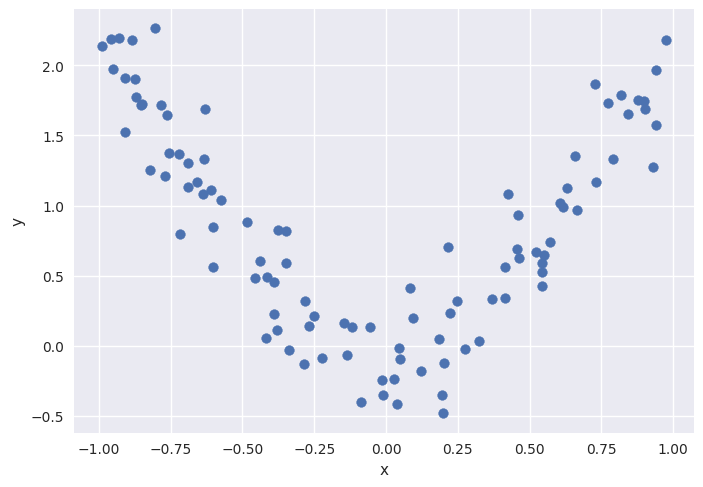

In [ ]:
import pandas as pd
import numpy as np
np.random.seed(42)
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.utils import shuffle

def f(x):
  return 3*x**2 - x**4

data_x = np.random.uniform(size=100, low=-1., high=1.)
data_y = f(data_x) + np.random.normal(size=100, loc=0., scale=0.3)

with plt.style.context('seaborn'):
  plt.scatter(data_x, data_y)
  plt.xlabel("x")
  plt.ylabel("y")

Let's do linear regression without features first

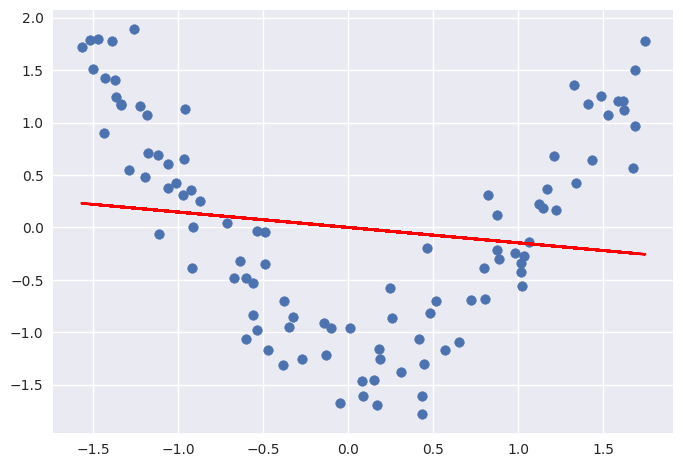

In [ ]:
#Preprocessing
X = zscore(data_x).reshape(-1,1)
t = zscore(data_y)

#Linear regression
from sklearn import linear_model #https://scikit-learn.org/stable/
m1 = linear_model.LinearRegression()
m1.fit(X, t)
w = np.concatenate((m1.coef_, [m1.intercept_]))

#Visualize prediction
with plt.style.context('seaborn'): # use your favorite style, if you don't like the standard one
  plt.scatter(X, t, label='true')
  y_pred1 = m1.predict(X)
  plt.plot(X, y_pred1, label='predicted', color='red')

In [ ]:
#Inspect and evaluate the model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import f_regression

print("w =", w)
print("MSE =", mean_squared_error(t, y_pred1))
print("R^2 =", r2_score(t, y_pred1))
print("F-statistic: ", f_regression(X, t))

w = [-1.46761500e-01 -2.25546108e-16]
MSE = 0.9784610621557119
R^2 = 0.02153893784428773
F-statistic:  (array([2.15728146]), array([0.14509823]))


To get better results, we will perform linear regression with *features*.

Consider input space $\mathcal{X}$ and output space $\mathbb{R}$

A *feature map* of dimension d is a function $\phi: \mathcal{X} \to \mathbb{R}^d$

For each input $x\in\mathcal{X}$, $\phi(x)$ is a **vector of features**
 $$\phi(x) = \begin{bmatrix}\phi_1(x)\\\phi_2(x)\\...\\\phi_d(x)\end{bmatrix}$$

 Once we have defined a feature map $\phi$, we can regard $\phi(\mathcal{X})$ (the image of $\mathcal{X}$ under $\phi$) as our new "input space"

### Example (one input variable, one feature)

$$\phi(x) = x^2$$

In [ ]:
def phi(x):
  return x**2

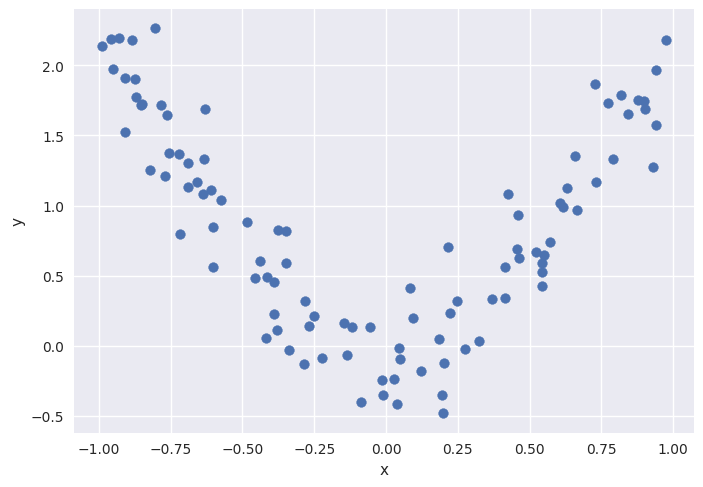

In [ ]:
with plt.style.context('seaborn'):
  plt.scatter(data_x, data_y)
  plt.xlabel("x")
  plt.ylabel("y")

Let's plot the data in **feature space**

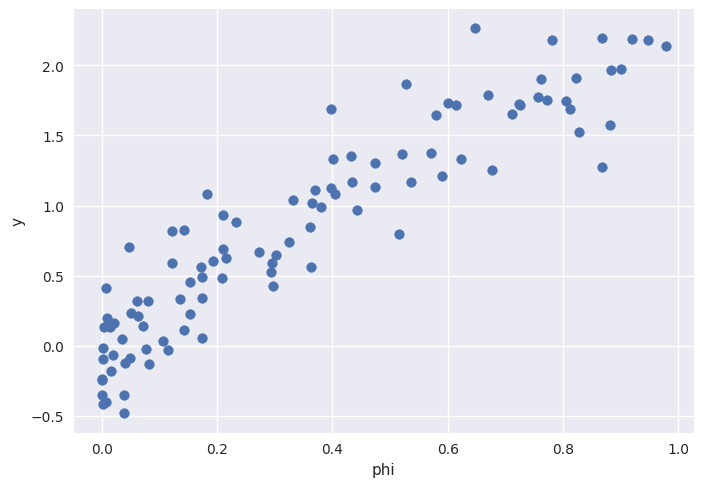

In [ ]:
with plt.style.context('seaborn'):
  plt.scatter(phi(data_x), data_y)

  plt.xlabel("phi")
  plt.ylabel("y")

Let's fit a linear model with these features

In [ ]:
PHI = zscore(phi(data_x)).reshape(-1,1)
t = zscore(data_y)
m2 = linear_model.LinearRegression()
m2.fit(PHI, t)
w2 = np.concatenate((m1.coef_, [m1.intercept_]))

Prediction in feature space (linear):

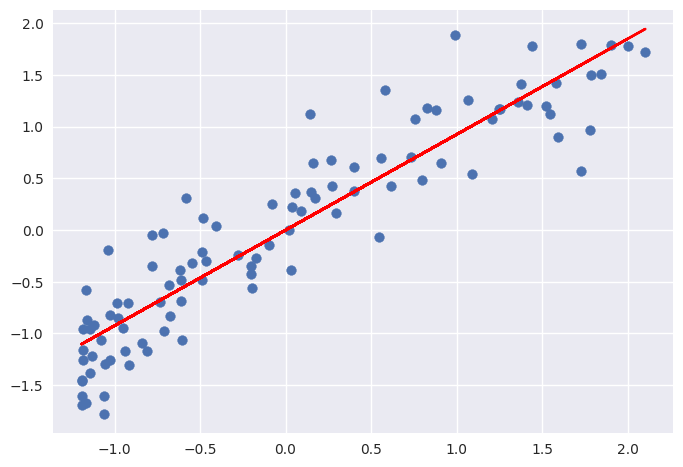

In [ ]:
with plt.style.context('seaborn'):
  plt.scatter(PHI, t, label='true')
  y_pred2 = m2.predict(PHI)
  plt.plot(PHI, y_pred2, label='predicted', color='red')

Prediction in *input* space:

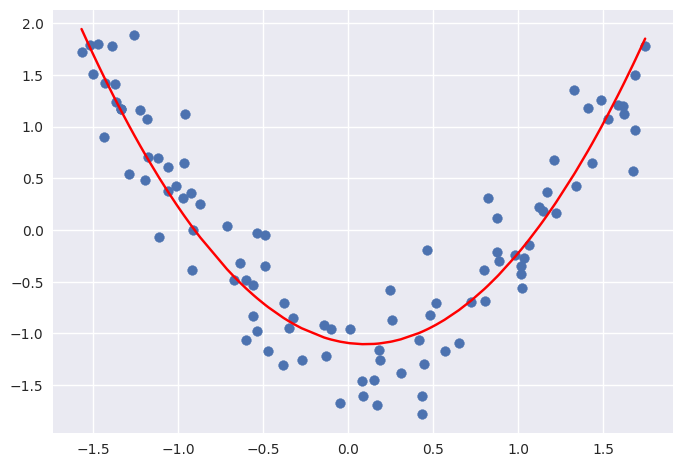

In [ ]:
with plt.style.context('seaborn'):
  plt.scatter(X, t, label='true')
  y_pred2 = m2.predict(PHI)
  ## sorting just for visualization purposes
  ii = X[:, 0].argsort()
  _X = X[ii]
  _y_pred2 = y_pred2[ii]
  ##
  plt.plot(_X, _y_pred2, label='predicted', color='red')

In [ ]:
print("w =", w2)
print("MSE =", mean_squared_error(t, y_pred2))
print("R^2 =", r2_score(t, y_pred2))
print("F-statistic: ", f_regression(PHI, t))

w = [-1.46761500e-01 -2.25546108e-16]
MSE = 0.14444929755804567
R^2 = 0.8555507024419543
F-statistic:  (array([580.43874395]), array([5.81329412e-43]))


The model we learned is **linear in the weights** but not in the input
$$ f(x) = w^\top \widetilde{\phi}(x) = w_0 + w_1 x^2 $$

where $\widetilde{\phi}(x) = [1, x^2]^\top$

## Logistic Regression with Features

In [ ]:
#Artificial dataset
n = 100
n_0 = 40
n_1 = n - n_0

xx_0 = np.random.multivariate_normal([0.,0.], [[1.,0.],[0.,1]], n_0)
xx_0 = xx_0 / np.linalg.norm(xx_0, axis=1, keepdims=True) + 0.1*np.ones((n_0,2))
xx_0 = xx_0 + np.random.multivariate_normal([0.,0.], [[0.01,0.],[0.,0.01]], n_0)
xx_1 = np.random.multivariate_normal([0.,0.], [[1,0.],[0.,1.]], n_1)
xx_1 = xx_1 / (2*np.linalg.norm(xx_1, axis=1, keepdims=True))
xx_1 = xx_1 + np.random.multivariate_normal([0.,0.], [[0.01,0.],[0.,0.01]], n_1)

data_x = zscore(np.concatenate((xx_0, xx_1)))
data_y = np.concatenate((np.zeros(n_0, dtype=int), np.ones(n_1, dtype=int)))
data_x, data_y = shuffle(data_x, data_y)

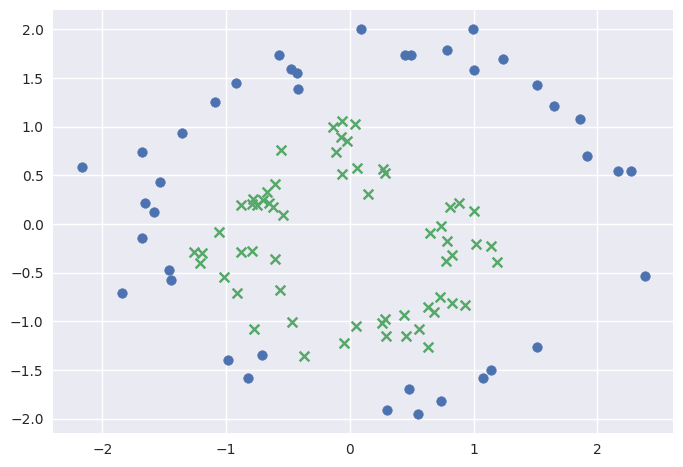

In [ ]:
with plt.style.context('seaborn'):
  plt.scatter(data_x[data_y==0,0], data_x[data_y==0,1])
  plt.scatter(data_x[data_y==1,0], data_x[data_y==1,1], marker='x')

First we perform logistic regression on raw input

In [ ]:
from sklearn.linear_model import LogisticRegression
X = data_x
t = data_y
log_classifier = LogisticRegression(penalty=None) # default is penalty='l2', that is l2 regularization!
log_classifier.fit(X, t)

LogisticRegression(penalty=None)

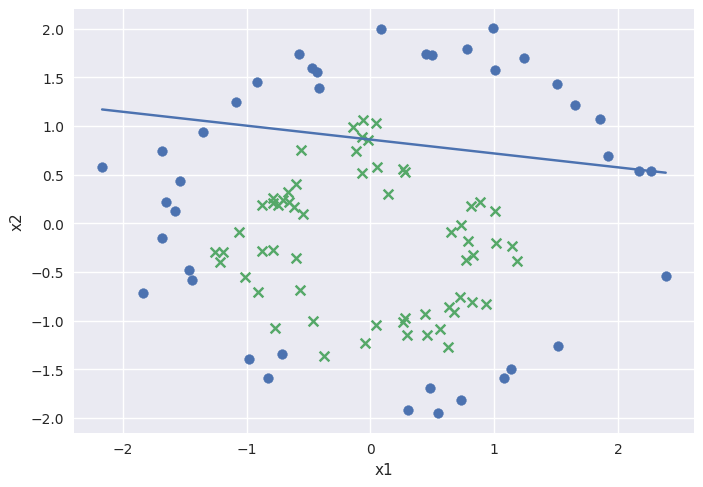

In [ ]:
def plot_ds(X, w, step=100, label='DS'):
  ds_x1 = np.linspace(X[:,0].min(), X[:,0].max(), step)
  ds_x2 = [-(w[0] + w[1]*x1) / w[2] for x1 in ds_x1]
  plt.plot(ds_x1, ds_x2, label=label)

with plt.style.context('seaborn'):
  plt.scatter(X[t==0,0], X[t==0,1])
  plt.scatter(X[t==1,0], X[t==1,1], marker='x')

  coef = log_classifier.coef_.flatten() # weights
  w0 = log_classifier.intercept_ # bias
  log_w = np.array([w0.item(), coef[0], coef[1]])
  plot_ds(X, log_w, label='Logistic Regression DS')

  plt.xlabel('x1')
  plt.ylabel('x2')

How good is our model?

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
t_pred = log_classifier.predict(X)
print("Accuracy: ", accuracy_score(t, t_pred))
print("Precision: ", precision_score(t, t_pred))
print("Recall: ", recall_score(t, t_pred))
print("F1: ", f1_score(t, t_pred))
print("Confusion Matrix:")
print(confusion_matrix(t, t_pred))

Accuracy:  0.74
Precision:  0.717948717948718
Recall:  0.9333333333333333
F1:  0.8115942028985509
Confusion Matrix:
[[18 22]
 [ 4 56]]


 Is it better than the *dummy classifier* ?

In [ ]:
dummy = np.ones(X.shape[0]) if n_1 > n_0 else np.zeros(X.shape[0])
print("Accuracy: ", accuracy_score(t, dummy))
print("Precision: ", precision_score(t, dummy))
print("Recall: ", recall_score(t, dummy))
print("F1: ", f1_score(t, dummy))
print("Confusion Matrix:")
print(confusion_matrix(t, dummy))

Accuracy:  0.6
Precision:  0.6
Recall:  1.0
F1:  0.7499999999999999
Confusion Matrix:
[[ 0 40]
 [ 0 60]]


To improve accuracy, we use *polar coordinates* as features:

$$
  \phi(x) = \phi\left(\begin{bmatrix}x_1\\x_2\end{bmatrix}\right) = \begin{bmatrix}\sqrt{x_1^2+x_2^2}\\\arctan(x_1/x_2)\end{bmatrix}
$$

In [ ]:
def phi(x):
  rho = np.linalg.norm(x, axis=-1)
  theta = np.arctan2(x[...,0], x[...,1])
  return np.stack((theta, rho), axis=-1)

Data in feature space:

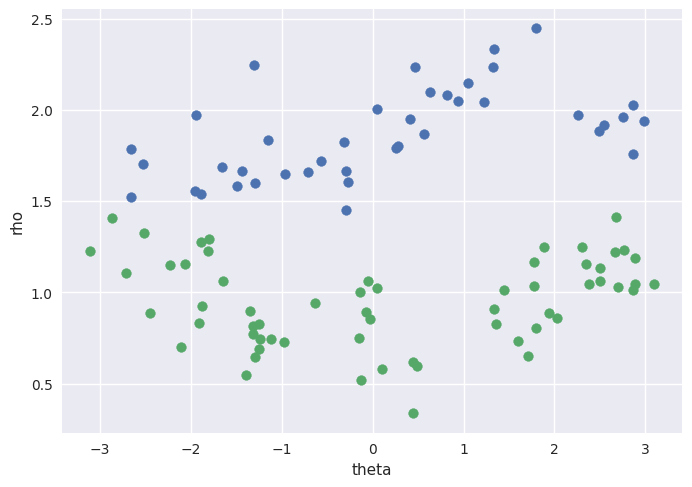

In [ ]:
data_phi = phi(data_x)

with plt.style.context('seaborn'):
  plt.scatter(data_phi[data_y==0,0], data_phi[data_y==0,1])
  plt.scatter(data_phi[data_y==1,0], data_phi[data_y==1,1], label='x')

  plt.xlabel("theta")
  plt.ylabel("rho")

In [ ]:
PHI = phi(data_x)

log_classifier2 = LogisticRegression() # default is penalty='l2', that is l2 regularization!
log_classifier2.fit(PHI, t)

LogisticRegression()

Decision bounday in feature space (linear):

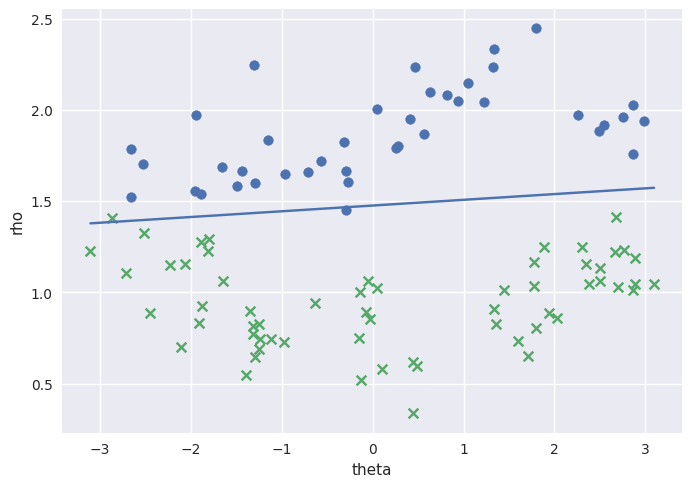

In [ ]:
with plt.style.context('seaborn'):
  plt.scatter(PHI[t==0,0], PHI[t==0,1])
  plt.scatter(PHI[t==1,0], PHI[t==1,1], marker='x')

  coef = log_classifier2.coef_.flatten() # weights
  w0 = log_classifier2.intercept_ # bias
  log_w = np.array([w0.item(), coef[0], coef[1]])
  plot_ds(PHI, log_w, label='Logistic Regression DS')

  plt.xlabel("theta")
  plt.ylabel("rho")

Decision boundary in input space:

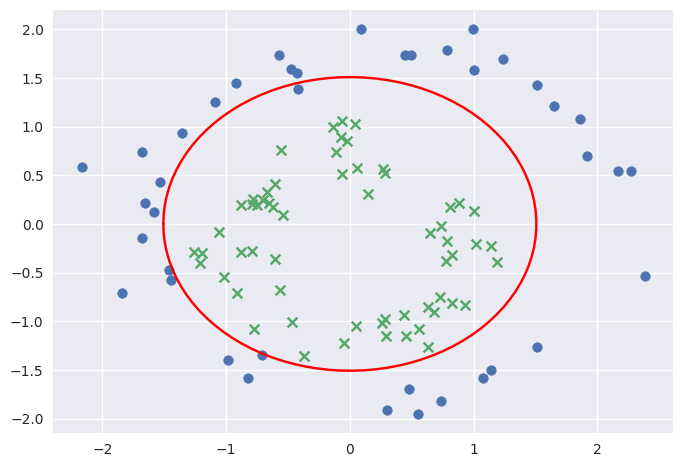

In [ ]:
with plt.style.context('seaborn'):
  plt.scatter(data_x[data_y==0,0], data_x[data_y==0,1])
  plt.scatter(data_x[data_y==1,0], data_x[data_y==1,1], marker='x')
  xy = []
  for theta in np.linspace(-np.pi,np.pi,100):
    rho = (-w0 / coef[1] - coef[0] / coef[1]).item()
    xy.append(np.array([rho*np.cos(theta), rho*np.sin(theta)]))

  xy = np.array(xy)
  plt.plot(xy[...,0], xy[...,1], color='r')

How good is our new model?

In [ ]:
t_pred = log_classifier2.predict(PHI)
print("Accuracy: ", accuracy_score(t, t_pred))
print("Precision: ", precision_score(t, t_pred))
print("Recall: ", recall_score(t, t_pred))
print("F1: ", f1_score(t, t_pred))
print("Confusion Matrix:")
print(confusion_matrix(t, t_pred))

Accuracy:  0.98
Precision:  0.9833333333333333
Recall:  0.9833333333333333
F1:  0.9833333333333333
Confusion Matrix:
[[39  1]
 [ 1 59]]
